In [1]:
import numpy as np
import matplotlib.pyplot as plt

### MSE(Mean squarred error)
$$E = \frac{1}{2}\sum_k(y_k - t_k)^2$$

### CEE(Cross entropy error)
$$E = -\sum_kt_k\log y_k$$

#### example
$$
\begin{bmatrix}
1 \\
0 \\
\vdots \\
0
\end{bmatrix}^T
\times
\ \begin{bmatrix}
0.6 \\
0.01 \\
\vdots \\
0.4
\end{bmatrix} = -1 \times \log 0.6 = 0.51
$$

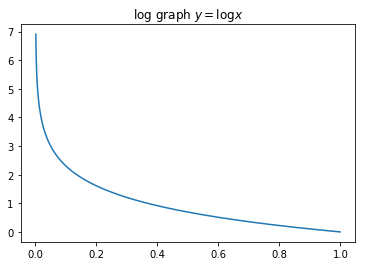

In [17]:
x = np.arange(0.001,1,0.001)
y = -np.log(x)
plt.plot(x,y)
plt.title('log graph $y=\log x$')
plt.show()

In [23]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

def cros_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [27]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print("small error")
print(mean_squared_error(np.array(y), np.array(t)))
print(cros_entropy_error(np.array(y), np.array(t)))

print("large error")
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
print(cros_entropy_error(np.array(y), np.array(t)))

small error
0.0975
0.510825457099
large error
0.5975
2.30258409299


Gradient descent

In [88]:
def f(x):
    return x[0]**2 + x[1]**2


def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) /(2*h)
        x[idx] = tmp_val
        
    return grad

def gradient_descent(f,init_x, lr=0.1, step_num=100):
    x = init_x
    acc_x = list()
    for i in range(step_num):
        acc_x.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x,np.array(acc_x)

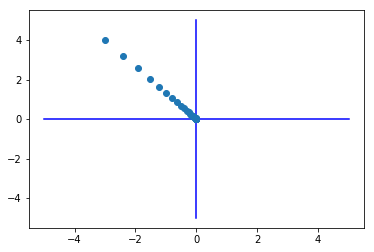

In [93]:
init_x = np.array([-3.0, 4.0])
x, history_x = gradient_descent(f,init_x)

plt.plot( [-5, 5], [0,0], '-b')
plt.plot( [0,0], [-5, 5], '-b')
plt.plot(history_x[:,0],history_x[:,1], 'o')
np.arange()
plt.show()

### Hyper parameter
The parameter that have to be set up by Human.
ex) Learning rate